In [518]:
import pandas as pd
import glob as glob
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [519]:
years = glob.glob('Individual_Years/*')

In [520]:
df_war = pd.DataFrame()
df_war_top = pd.DataFrame()
df_war_second = pd.DataFrame()
for item in years:
    year = item.split("(")[1].split(")")[0]
    if len(year)==2:
        year = "19"+year
    df = pd.read_csv(item)
    df["Year"] = int(year)
    df_war = df_war.append(df)
    df_war_top = df_war_top.append(df.iloc[0])

In [521]:
df_war = df_war.sort_values("Year", ascending=False)
df_war = df_war[df_war['Team'] != "- - -"]
df_war = df_war.dropna(subset=["Name"])
df_war.to_csv("DF_War.csv", index=False)
df_war = df_war.reset_index()
df_war = df_war.drop("index", axis=1)

In [522]:
def player_teammate_avg_war(player, dataframe):
    Player_Total = dataframe[dataframe['Name']==player]
    Not_Player = dataframe[dataframe['Name']!=player]
    
    team = list(Player_Total['Team'])
    years = list(Player_Total['Year'])
    
    df_output = pd.DataFrame()
    for item in range(0,len(team)):
        teamID = team[item]
        yearID = years[item]
        temp = Not_Player[Not_Player['Team'].isin([teamID]) & Not_Player['Year'].isin([yearID])]
        df_output = df_output.append(temp)

    
    return(df_output['Total WAR'].mean())

In [513]:
top = df_war.groupby("Name").mean()
top = top[top["Total WAR"]>3]
top = top[['Total WAR']].sort_values("Total WAR", ascending=False)
top_player_names = list(top.index)
top['Teammate WAR Average'] = [player_teammate_avg_war(x, df_war) for x in top.index]
top = top.reset_index()
top["Delta"] = top['Total WAR'] - top['Teammate WAR Average']
top = top.sort_values("Delta", ascending=False)
top

,Name,Total WAR,Teammate WAR Average,Delta
1,Mike Trout,8.133333,0.589362,7.543972
0,Babe Ruth,8.213636,1.302465,6.911172
2,Barry Bonds,7.477273,0.792477,6.684795
4,Willie Mays,7.047619,0.958896,6.088723
3,Honus Wagner,7.072222,1.068639,6.003583
...,...,...,...,...
335,Fielder Jones,3.218182,1.635468,1.582714
407,Chick Stahl,3.028571,1.477931,1.550640
314,Bill Dickey,3.294118,1.747111,1.547007
288,Dummy Hoy,3.350000,1.821212,1.528788


In [539]:
top = df_war.groupby("Name").mean()
top = top[top["Total WAR"]>6]
top = top[['Total WAR']].sort_values("Total WAR", ascending=False)
top_player_names = list(top.index)
top['Teammate WAR Average'] = [player_teammate_avg_war(x, df_war) for x in top.index]
top = top.reset_index()
top["Delta"] = top['Total WAR'] - top['Teammate WAR Average']
top = top.sort_values("Teammate WAR Average", ascending=True)
top

,Name,Total WAR,Teammate WAR Average,Delta
1,Mike Trout,8.133333,0.589362,7.543972
12,Walter Johnson,6.023810,0.775197,5.248612
2,Barry Bonds,7.477273,0.792477,6.684795
11,Mookie Betts,6.200000,0.834440,5.365560
4,Willie Mays,7.047619,0.958896,6.088723
10,Ty Cobb,6.225000,1.006608,5.218392
8,Cy Young,6.345455,1.023985,5.321469
3,Honus Wagner,7.072222,1.068639,6.003583
5,Ted Williams,6.868421,1.107427,5.760994
9,Mickey Mantle,6.227778,1.194528,5.033249


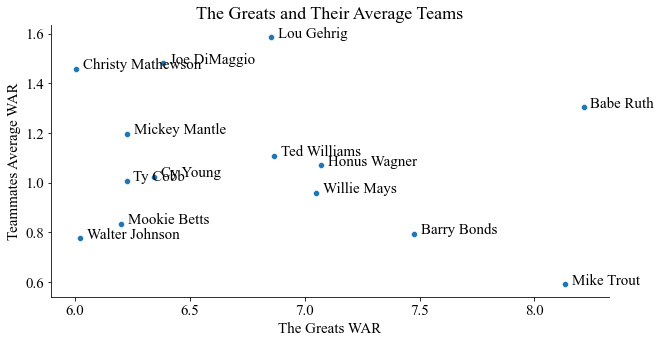

In [540]:
rc = {'figure.figsize':(10,5),
      'axes.facecolor':'white',
      'axes.grid' : False,
      'grid.color': '.8',
      'font.family':'Times New Roman',
      'font.size' : 15}
plt.rcParams.update(rc)

sns.scatterplot(x="Total WAR", y="Teammate WAR Average", data=top)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)

plt.title('The Greats and Their Average Teams')
# Set x-axis label
plt.xlabel('The Greats WAR')
# Set y-axis label
plt.ylabel('Teammates Average WAR')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.03, point['y'], str(point['val']))
    

label_point(top['Total WAR'], top['Teammate WAR Average'], top['Name'], plt.gca())  
plt.savefig("Greats_Teammates_War.png", dpi=300)

## Find top war per year

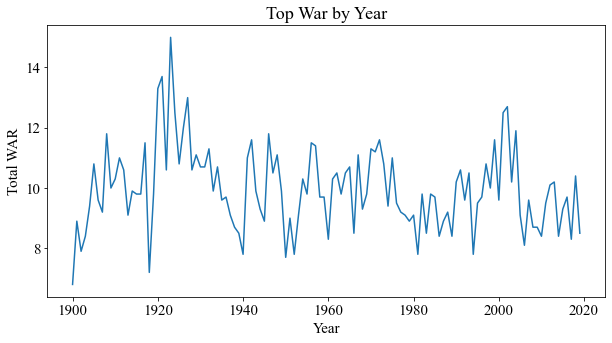

In [524]:
df_war_top = df_war_top.sort_values("Year", ascending=True)
sns.lineplot(x="Year", y="Total WAR", data=df_war_top).set(title='Top War by Year')
plt.savefig("TopWARbyYear.png", dpi=300)

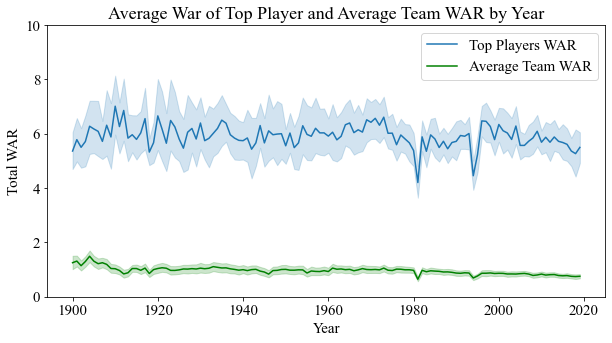

In [525]:
df_war = df_war.sort_values(by="Total WAR", ascending=False)
df_war_top_team = df_war.drop_duplicates(subset=["Team", "Year"], keep="first")
sns.lineplot(x="Year", y="Total WAR", label="Top Players WAR", data=df_war_top_team).set(title='Average War of Top Player and Average Team WAR by Year')
sns.lineplot(x="Year", y="Total WAR", label="Average Team WAR",data=df_war, color="green")
plt.ylim(0,10)

plt.savefig("AverageWARbyYear.png", dpi=300)

In [526]:
top_players = list(df_war_top_team.index)
df_other_guys = df_war.drop(index=top_players)

In [527]:
## Calculate 
teams_average = df_other_guys.groupby(['Team', 'Year']).mean()
teams_average = teams_average.reset_index()
teams_average = teams_average.drop(['playerid', "PA", "IP", "Primary WAR"], axis=1)
teams_average.columns = ['Team', "Year", "Average Total WAR"]

In [528]:
top_war_players = pd.merge(teams_average, df_war_top_team, 
                           left_on=["Team", "Year"],
                           right_on=["Team", "Year"])

top_war_players['Difference_From_Average_WAR'] = top_war_players['Total WAR'] - top_war_players['Average Total WAR']
top_war_players = top_war_players.sort_values(by="Difference_From_Average_WAR",ascending=False)

#### Difference_From_Second_Best_WAR

In [529]:
df_war_second_team = df_other_guys.drop_duplicates(subset=["Team", "Year"], keep="first")
df_war_second_team = df_war_second_team[["Team", "Year", "Total WAR"]]
df_war_second_team.columns = ['Team', "Year", "Second Best WAR"]

In [530]:
top_war_players = pd.merge(df_war_second_team, top_war_players, 
                           left_on=["Team", "Year"],
                           right_on=["Team", "Year"])

top_war_players['Delta Second Best WAR'] = top_war_players['Total WAR'] - top_war_players['Second Best WAR']
top_war_players = top_war_players.sort_values(by="Delta Second Best WAR",ascending=False)

In [535]:
Supers = top_war_players[top_war_players['Delta Second Best WAR']>5]

In [564]:
Supers = top_war_players[top_war_players['Total WAR']>10]
Supers = Supers[Supers['Second Best WAR']<3]
Supers = Supers.groupby("Name").count().sort_values("Team", ascending=False)

In [565]:
Supers

,Team,Year,Second Best WAR,Average Total WAR,playerid,Pos,PA,IP,Primary WAR,Total WAR,Difference_From_Average_WAR,Delta Second Best WAR
Name,,,,,,,,,,,,
Mike Trout,1,1,1,1,1,1,1,0,1,1,1,1
Steve Carlton,1,1,1,1,1,1,0,1,1,1,1,1


In [536]:
x = Supers.groupby("Name").count()
x.sort_values("Pos", ascending=False).head(27)

,Team,Year,Second Best WAR,Average Total WAR,playerid,Pos,PA,IP,Primary WAR,Total WAR,Difference_From_Average_WAR,Delta Second Best WAR
Name,,,,,,,,,,,,
Mike Trout,5,5,5,5,5,5,5,0,5,5,5,5
Babe Ruth,5,5,5,5,5,5,5,0,5,5,5,5
Rogers Hornsby,5,5,5,5,5,5,5,0,5,5,5,5
Barry Bonds,4,4,4,4,4,4,4,0,4,4,4,4
Ty Cobb,3,3,3,3,3,3,3,0,3,3,3,3
Ted Williams,3,3,3,3,3,3,3,0,3,3,3,3
Walter Johnson,3,3,3,3,3,3,0,3,3,3,3,3
Honus Wagner,2,2,2,2,2,2,2,0,2,2,2,2
Willie Mays,2,2,2,2,2,2,2,0,2,2,2,2


In [537]:
teams = pd.read_csv("Teams.csv")
teams['name'] = teams['name'].replace("Los Angeles Angels of Anaheim", "Los Angeles Angels")
teams['name'] = teams['name'].replace("Boston Red Sox", "RedSox")
teams['name'] = teams['name'].replace("Chicago White Sox", "WhiteSox")
teams['name'] = teams['name'].replace("Toronto Blue Jays", "BlueJays")

teams['Team'] = [x.split(" ")[-1] for x in teams['name']]
teams['Team'] = teams['Team'].replace("RedSox", "Red Sox")
teams['Team'] = teams['Team'].replace("WhiteSox", "White Sox")
teams['Team'] = teams['Team'].replace("BlueJays", "Blue Jays")

teams = teams[["yearID", "W", "L", "name", "Team"]]

### Mike Trout
4/6 seasons below .500 with a war greater than 4 from the second best player.

In [538]:
Trout = Supers[Supers['Name']=="Mike Trout"]
Trout = pd.merge(Trout, teams, left_on=['Team', "Year"], right_on=["Team", "yearID"])
Trout['Win_Percentage'] = round(Trout['W']/(Trout['W']+Trout["L"]) * 100, 2)
Trout = Trout[["Name", "Year", "Team","Win_Percentage",'Total WAR', "Second Best WAR", "Average Total WAR", "Delta Second Best WAR", "W", "L"]]
Trout

,Name,Year,Team,Win_Percentage,Total WAR,Second Best WAR,Average Total WAR,Delta Second Best WAR,W,L
0,Mike Trout,2013,Angels,48.15,10.2,2.9,0.495122,7.3,78,84
1,Mike Trout,2016,Angels,45.68,9.7,3.5,0.360000,6.2,74,88
2,Mike Trout,2015,Angels,52.47,9.3,3.2,0.550000,6.1,85,77
3,Mike Trout,2012,Angels,54.94,10.1,4.7,0.908571,5.4,89,73
4,Mike Trout,2019,Angels,44.44,8.5,3.3,0.341667,5.2,72,90


### Babe Ruth
5/5 seasons > .500 w/ Yankees

In [451]:
Babe = Supers[Supers['Name']=="Babe Ruth"]
Babe = pd.merge(Babe, teams, left_on=['Team', "Year"], right_on=["Team", "yearID"])
Babe['Win_Percentage'] = round(Babe['W']/(Babe['W']+Babe["L"]) * 100, 2)
Babe = Babe[["Name", "Year", "Team","Win_Percentage",'Total WAR', "Second Best WAR", "Average Total WAR", "Delta Second Best WAR", "W", "L"]]
Babe

,Name,Year,Team,Win_Percentage,Total WAR,Second Best WAR,Average Total WAR,Delta Second Best WAR,W,L
0,Babe Ruth,1923,Yankees,64.47,15.0,4.5,1.313043,10.5,98,54
1,Babe Ruth,1920,Yankees,61.69,13.3,4.9,1.248000,8.4,95,59
2,Babe Ruth,1924,Yankees,58.55,12.5,4.3,0.816667,8.2,89,63
3,Babe Ruth,1921,Yankees,64.05,13.7,6.0,1.469231,7.7,98,55
4,Babe Ruth,1919,Red Sox,48.18,9.8,3.8,0.810000,6.0,66,71
5,Babe Ruth,1926,Yankees,59.09,12.0,7.0,1.207407,5.0,91,63


### Barry Bonds
8/9 winning seasons when greater than the next war by 4

In [454]:
Bonds = Supers[Supers['Name']=="Barry Bonds"]
Bonds = pd.merge(Bonds, teams, left_on=['Team', "Year"], right_on=["Team", "yearID"])
Bonds['Win_Percentage'] = round(Bonds['W']/(Bonds['W']+Bonds["L"]) * 100, 2)
Bonds = Bonds[["Name", "Year", "Team","Win_Percentage",'Total WAR', "Second Best WAR", "Average Total WAR", "Delta Second Best WAR", "W", "L"]]
Bonds

,Name,Year,Team,Win_Percentage,Total WAR,Second Best WAR,Average Total WAR,Delta Second Best WAR,W,L
0,Barry Bonds,1996,Giants,41.98,9.2,2.6,0.343243,6.6,68,94
1,Barry Bonds,2002,Giants,59.01,12.7,6.7,1.200000,6.0,95,66
2,Barry Bonds,2001,Giants,55.56,12.5,7.1,1.068966,5.4,90,72
3,Barry Bonds,2004,Giants,56.17,11.9,6.6,0.778947,5.3,91,71
4,Barry Bonds,1990,Pirates,58.64,9.9,4.9,0.908108,5.0,95,67
5,Barry Bonds,1997,Giants,55.56,8.9,4.1,0.853333,4.8,90,72
6,Barry Bonds,1993,Giants,63.58,10.5,6.1,1.032432,4.4,103,59
7,Barry Bonds,1998,Giants,54.60,8.5,4.2,1.040000,4.3,89,74
8,Barry Bonds,2003,Giants,62.11,10.2,6.0,0.800000,4.2,100,61
